- Using XGBoost to predict prices that are continous

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
price_dataset = pd.read_csv("Housing.csv")

In [3]:
print(price_dataset)

               id             date     price  bedrooms  bathrooms  \
0      7229300521  20141013T000000  231300.0         2       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242   

In [8]:
df = pd.DataFrame(price_dataset)
#df = pd.DataFrame(price_dataset, columns = price_dataset.feature_name)
# if the dataset is showing numerals instead of columns

In [12]:
# printing 1st rows
data = df.drop("date", axis=1)
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
# checking the number of rows of columns
data.shape

(21613, 20)

In [14]:
 # checking for the missing 
data.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [15]:
# statistical measute of the dataset
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580306e+09,5.400886e+05,3.370795,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876570e+09,3.671268e+05,0.930105,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


understanding the correlation between various features in the dataset
1. Positive correlation ( if one value increases, also the other increase)
2. Negative correlation (if one value decreases, the other decreases)


In [17]:
correlation = data.corr()

<Axes: >

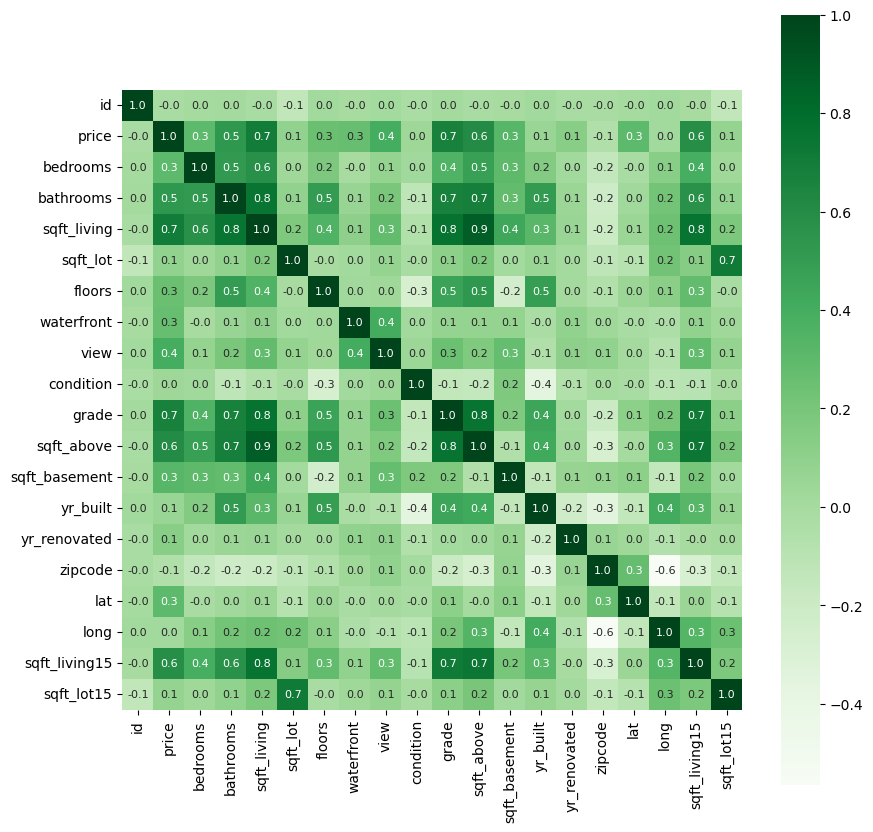

In [25]:
 # ploting the heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={"size":8}, cmap="Greens")

Splitting the data and target

In [26]:
X = data.drop(["price"], axis=1)
Y = data["price"]

In [28]:
print(X)
print("----------------------------------------")
print(Y)

               id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      7229300521         2       1.00         1180      5650     1.0   
1      6414100192         3       2.25         2570      7242     2.0   
2      5631500400         2       1.00          770     10000     1.0   
3      2487200875         4       3.00         1960      5000     1.0   
4      1954400510         3       2.00         1680      8080     1.0   
...           ...       ...        ...          ...       ...     ...   
21608   263000018         3       2.50         1530      1131     3.0   
21609  6600060120         4       2.50         2310      5813     2.0   
21610  1523300141         2       0.75         1020      1350     2.0   
21611   291310100         3       2.50         1600      2388     2.0   
21612  1523300157         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7        11

Splitting the Data into Train and Test data

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(21613, 19) (17290, 19) (4323, 19)


Model Training
- XGBoost Regresser (Decision Tree Algorithm)

In [31]:
model = XGBRegressor()

In [33]:
# training the model witj X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Model Evaluation
- Accuracy is not good for regression, but use matrix like r sqaured


Prediction On Training Data

In [39]:
data_pred = model.predict(X_test)
print(data_pred)

[ 667042.5  1319620.6   446467.34 ...  352642.8   395961.53  234182.81]


ValueError: x and y must be the same size

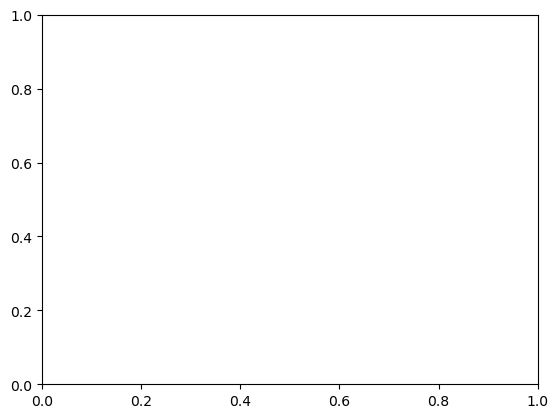

In [43]:
# Visualizing the actual prices and predicted prices
plt.scatter(Y_train, data_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices Vs Predicted Prices")
plt.show()

In [40]:
# R Squared error
score_1 = metrics.r2_score(Y_test, data_pred)

# Mean absolute eeror
score_2 = metrics.mean_absolute_error(Y_test, data_pred)

print("R Squared error: ", score_1) # lesser the value, the better accuracy
print("Mean Absolute error: ", score_2) # 

R Squared error:  0.9028759832402216
Mean Absolute error:  66959.42252378268


Prediction on Test Data

In [ ]:
test_data_pred = model.predict(X_test)
